# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives
5. Applicants who are married
6. Applicants with fewer dependents
7. Applicants who are not self-employed
8. Applicants applying for a lower loan amount
9. Applicants applying for a shorter-term loan

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
sns.set()
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("..\data\data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
# check for duplicate Loan_IDs
df['Loan_ID'].nunique() - len(df)

0

In [5]:
df.replace({
    "Loan_Status" : {'Y' : 1, 'N' : 0},
    }, inplace=True)

In [6]:
df = df.rename({
    'Self_Employed': 'Self Employed', 
    'ApplicantIncome': 'Applicant Income',
    'CoapplicantIncome': 'Coapplicant Income', 
    'LoanAmount': 'Loan Amount',
    'Loan_Amount_Term': 'Loan Amount Term',
    'Credit_History': 'Credit History',
    'Property_Area': 'Property Area',
    'Loan_Status': 'Loan Status'}, axis=1)

In [7]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [8]:
# creating target variable
y = df["Loan Status"]
df = df.drop(columns=["Loan Status","Loan_ID"]) # Loan_ID is just a unique value for each record - doesn't add any information

In [9]:
# identify categorical and numeric features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self Employed       582 non-null    object 
 5   Applicant Income    614 non-null    int64  
 6   Coapplicant Income  614 non-null    float64
 7   Loan Amount         592 non-null    float64
 8   Loan Amount Term    600 non-null    float64
 9   Credit History      564 non-null    float64
 10  Property Area       614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [10]:
# credit history is actually a categorical feature
df['Credit History'] = df['Credit History'].astype(str)

In [11]:
df = df.replace({'Credit History':{'nan':np.nan}})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self Employed       582 non-null    object 
 5   Applicant Income    614 non-null    int64  
 6   Coapplicant Income  614 non-null    float64
 7   Loan Amount         592 non-null    float64
 8   Loan Amount Term    600 non-null    float64
 9   Credit History      564 non-null    object 
 10  Property Area       614 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 52.9+ KB


In [13]:
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

In [14]:
# train/test split
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=123) # small dataset, so use a relatively smaller portion for test data in order to keep as much data as possible to train the model
print(df_train.shape)
print(df_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


In [15]:
# identify categorical and numeric features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 579 to 510
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              483 non-null    object 
 1   Married             488 non-null    object 
 2   Dependents          477 non-null    object 
 3   Education           491 non-null    object 
 4   Self Employed       467 non-null    object 
 5   Applicant Income    491 non-null    int64  
 6   Coapplicant Income  491 non-null    float64
 7   Loan Amount         474 non-null    float64
 8   Loan Amount Term    478 non-null    float64
 9   Credit History      451 non-null    object 
 10  Property Area       491 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 46.0+ KB


In [16]:
cat_feats

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self Employed',
 'Credit History',
 'Property Area']

In [17]:
num_feats

['Applicant Income', 'Coapplicant Income', 'Loan Amount', 'Loan Amount Term']

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [18]:
df_train.isnull().sum()

Gender                 8
Married                3
Dependents            14
Education              0
Self Employed         24
Applicant Income       0
Coapplicant Income     0
Loan Amount           17
Loan Amount Term      13
Credit History        40
Property Area          0
dtype: int64

In [19]:
# percentage of nulls in each column

100*(df_train.isnull().sum()/len(df_train))

Gender                1.629328
Married               0.610998
Dependents            2.851324
Education             0.000000
Self Employed         4.887984
Applicant Income      0.000000
Coapplicant Income    0.000000
Loan Amount           3.462322
Loan Amount Term      2.647658
Credit History        8.146640
Property Area         0.000000
dtype: float64

What to do about missing values:

- Gender, Married, Dependents, Self-Employed, Credit History: replace with most common value
- Loan Amount, Loan Amount Term: replace with mean value

In [20]:
y_train.isnull().sum()

0

Look at some basic statistics for numerical variables.

In [21]:
df_train[num_feats].describe()

,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term
count,491.000000,491.000000,474.000000,478.000000
mean,5161.564155,1501.276823,143.786920,341.673640
std,5202.049409,2411.057647,81.299689,65.990614
min,150.000000,0.000000,9.000000,12.000000
25%,2923.500000,0.000000,100.000000,360.000000
50%,3846.000000,1010.000000,126.000000,360.000000
75%,5717.000000,2292.500000,168.000000,360.000000
max,81000.000000,33837.000000,650.000000,480.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [22]:
# How many applicants have a Credit_History:
has_CH = round(df_train['Credit History'].astype(float).sum())
applicants = df_train['Credit History'].count()
percent_has_CH = round((100*has_CH / applicants),2)

print(f'Out of {applicants} applicants, {has_CH} applicants ({percent_has_CH}%) have a credit history.')

Out of 451 applicants, 381 applicants (84.48%) have a credit history.


<AxesSubplot: xlabel='Coapplicant Income', ylabel='Count'>

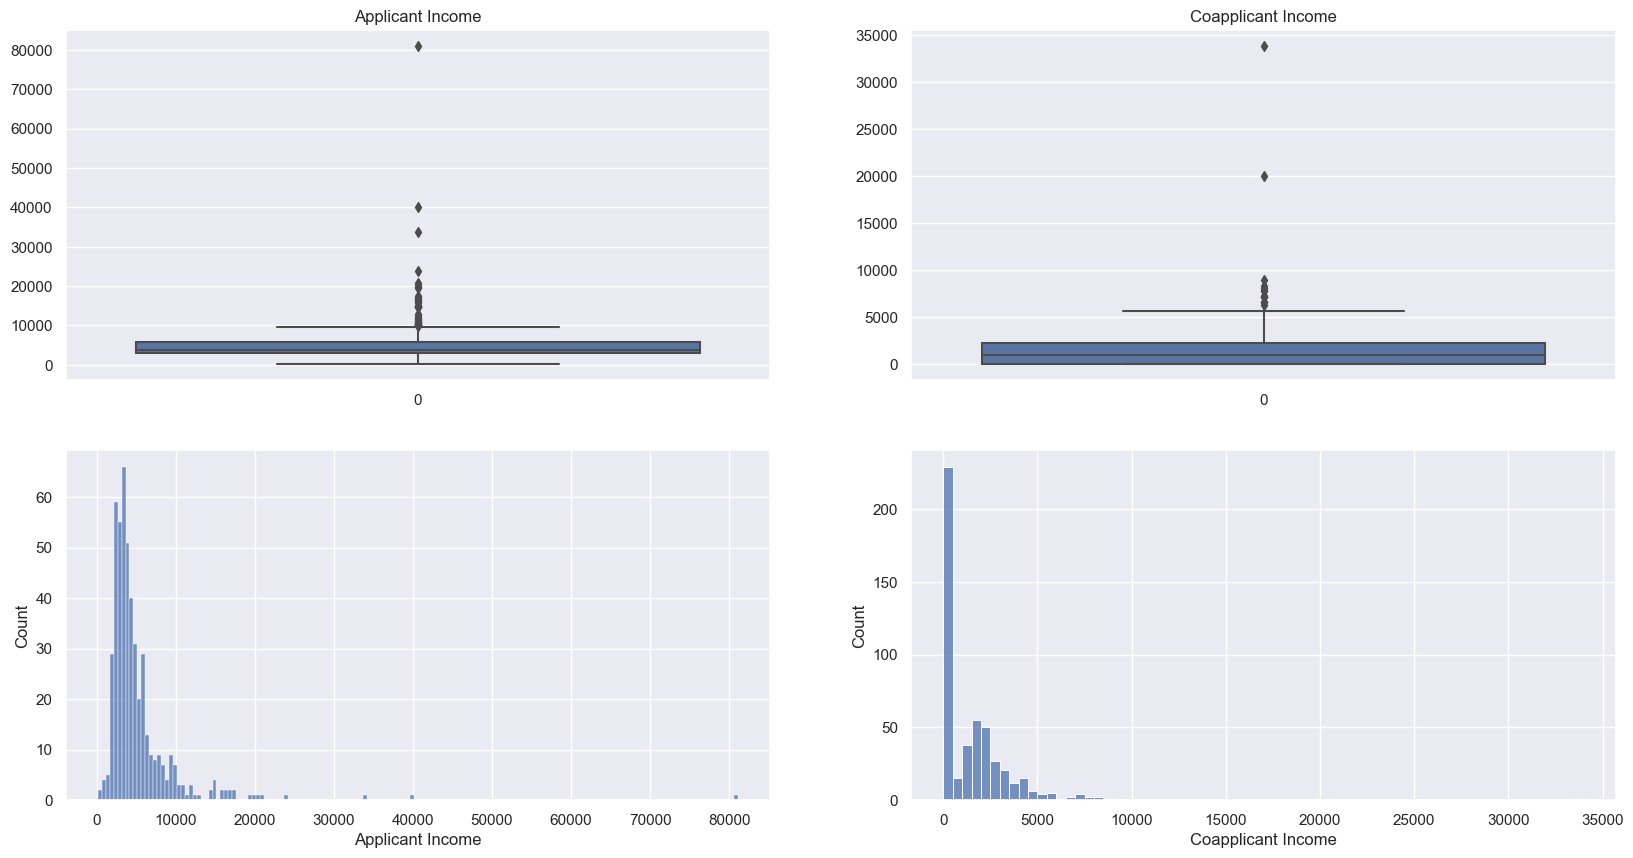

In [23]:
fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,10))

sns.boxplot(ax=axes[0][0], data=df_train['Applicant Income'])
axes[0][0].set_title('Applicant Income')
sns.boxplot(ax=axes[0][1], data=df_train['Coapplicant Income'])
axes[0][1].set_title(f'Coapplicant Income')
sns.histplot(ax=axes[1][0], data=df_train['Applicant Income'], binwidth=500)
sns.histplot(ax=axes[1][1], data=df_train['Coapplicant Income'], binwidth=500)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

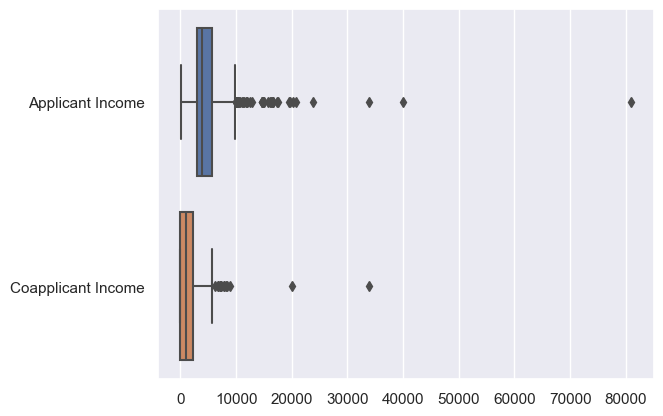

In [24]:
sns.boxplot(data=df_train[['Applicant Income','Coapplicant Income']], orient='h')

Applicant and coapplicant income are both positively skewed because of outliers with very large income values. It seems likely, based on the other datapoints, that some of the outliers are errors (perhaps an extra zero was added to an income of 8000 to give 80000)

<AxesSubplot: xlabel='Loan Amount Term', ylabel='Count'>

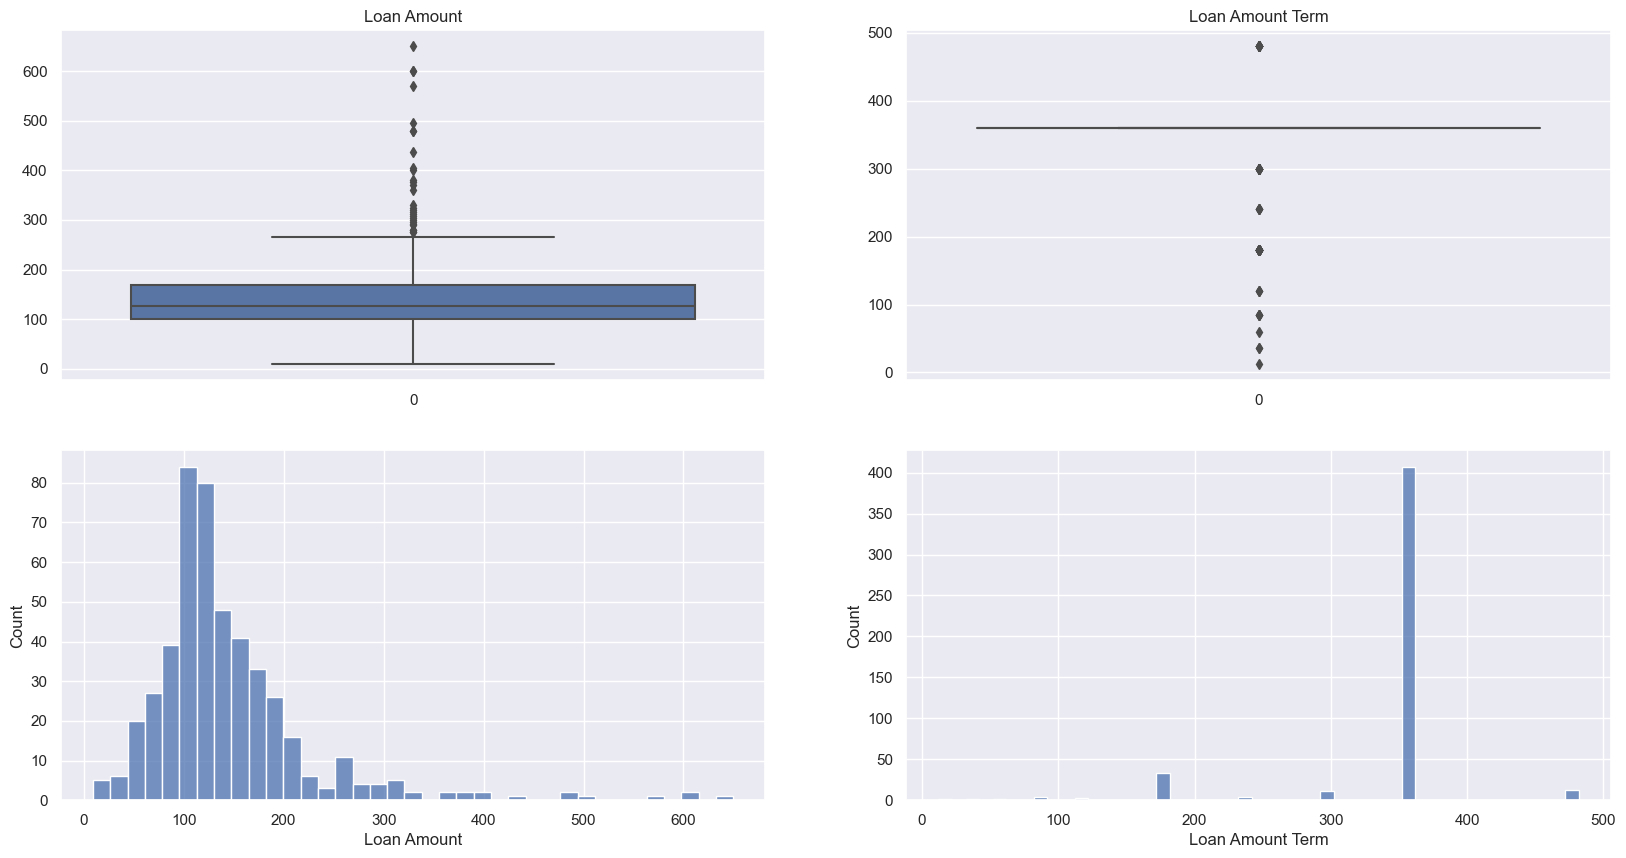

In [25]:
fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,10))

sns.boxplot(ax=axes[0][0], data=df_train['Loan Amount'])
axes[0][0].set_title('Loan Amount')
sns.boxplot(ax=axes[0][1], data=df_train['Loan Amount Term'])
axes[0][1].set_title(f'Loan Amount Term')
sns.histplot(ax=axes[1][0], data=df_train['Loan Amount'])
sns.histplot(ax=axes[1][1], data=df_train['Loan Amount Term'], binwidth=10)

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [26]:
for feat in cat_feats:
    print(f'{feat} categories: {df_train[feat].nunique()}')

Gender categories: 2
Married categories: 2
Dependents categories: 4
Education categories: 2
Self Employed categories: 2
Credit History categories: 2
Property Area categories: 3


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [27]:
def uni_analyis_categorical(df, feature):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.transforms as mtrans

    fig, ax = plt.subplots(figsize=(4,4))
    sns.countplot(data = df, y = feature, order = df[feature].value_counts().index, orient='h', palette = 'magma')
    plt.title(f'{feature} frequency')

    cat_count = df[feature].nunique()

    trans = mtrans.blended_transform_factory(fig.transFigure, mtrans.IdentityTransform())

    txt = fig.text(0, 10, f'Number of categories : {cat_count}', ha='center')
    txt.set_transform(trans)

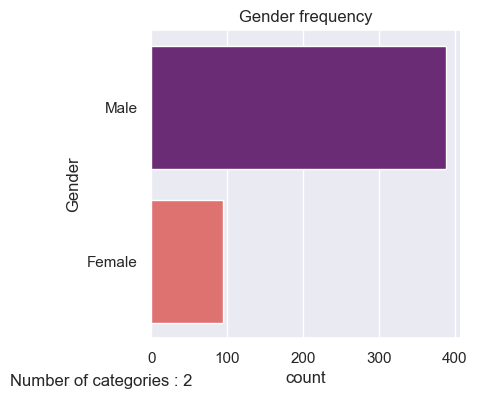

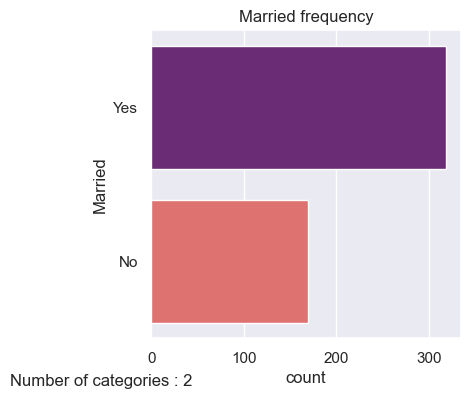

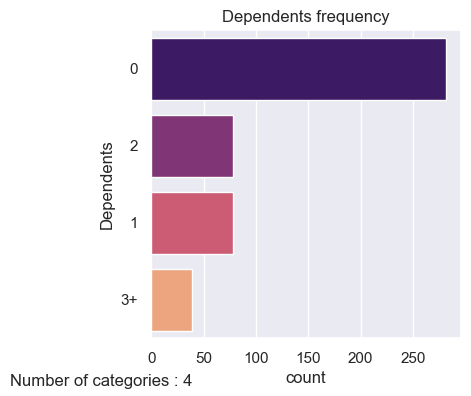

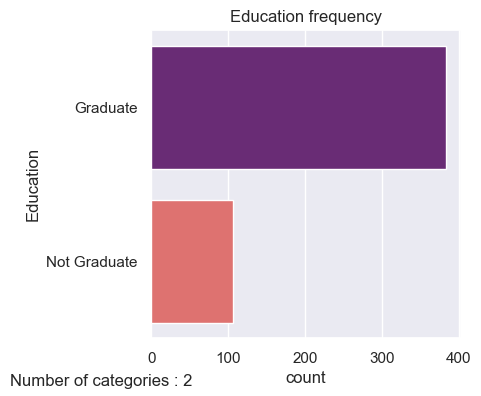

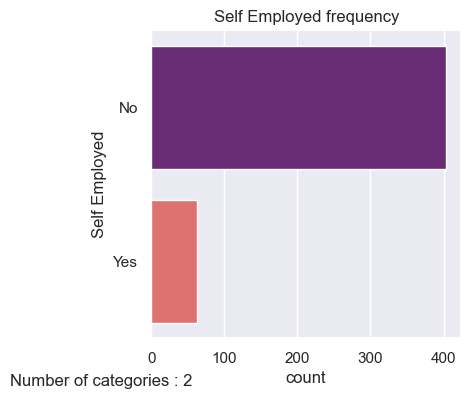

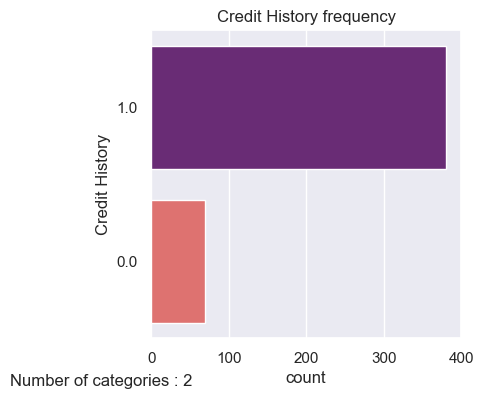

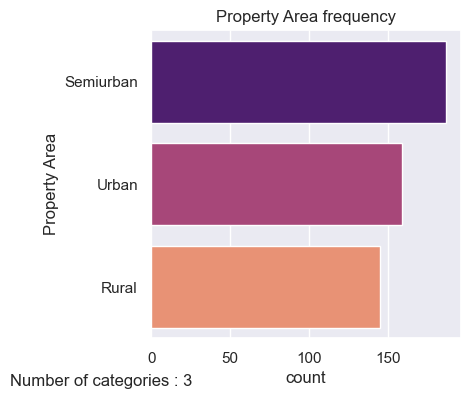

In [28]:
for feat in cat_feats:
    uni_analyis_categorical(df_train, feature=feat)

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [29]:
def uni_analyis_continuous(df, feature, feature_title):
    
    import matplotlib.pyplot as plt
    import matplotlib.transforms as mtrans

    fig, axes = plt.subplots(1,2, sharex=False, figsize=(20,5))
    fig.suptitle(f'Univariate Analysis - {feature_title}')

    sns.boxplot(ax=axes[0], data=df[feature])
    axes[0].set_title(f'{feature_title} Boxplot')
    sns.histplot(ax=axes[1], data=df[feature])
    axes[1].set_title(f'{feature_title} Histogram')

    Minimum = min(df[feature])
    Median = df[feature].median()
    Mean = df[feature].mean()
    Maximum = max(df[feature])
    
    trans = mtrans.blended_transform_factory(fig.transFigure, mtrans.IdentityTransform())

    txt = fig.text(0.5,10, f'Minimum : {Minimum}, Median : {Median}, Mean : {Mean}, Maximum : {Maximum}', ha='center', va='center_baseline')
    txt.set_transform(trans)

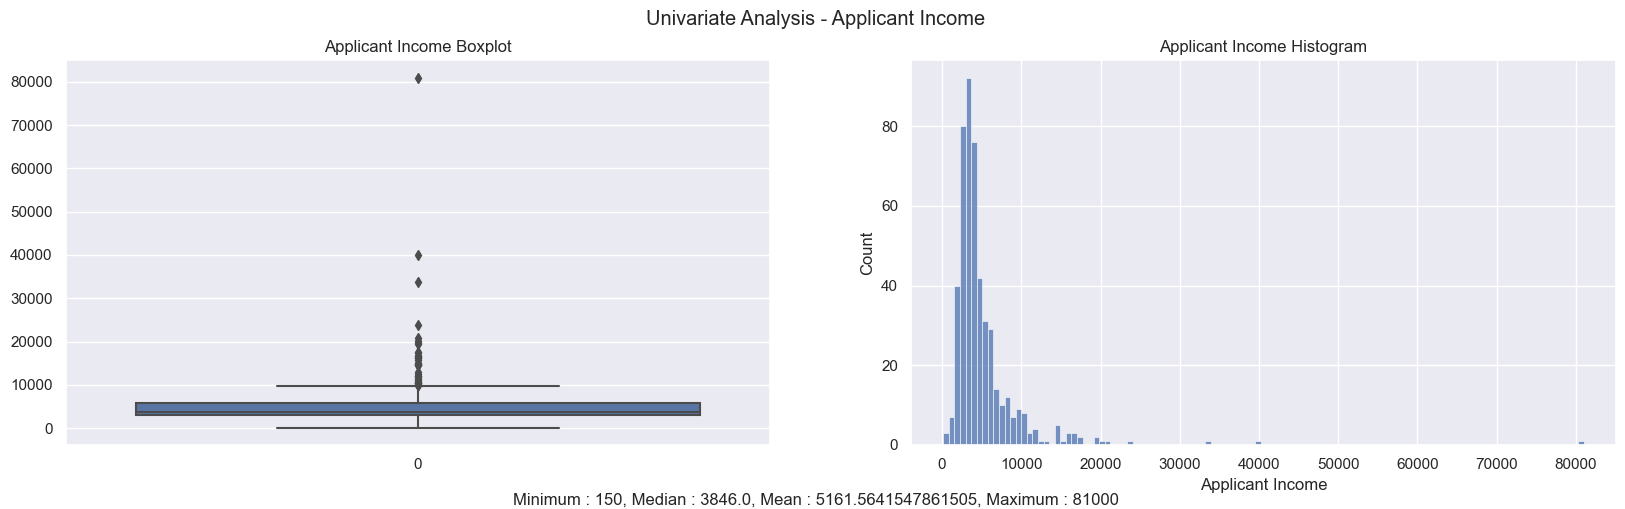

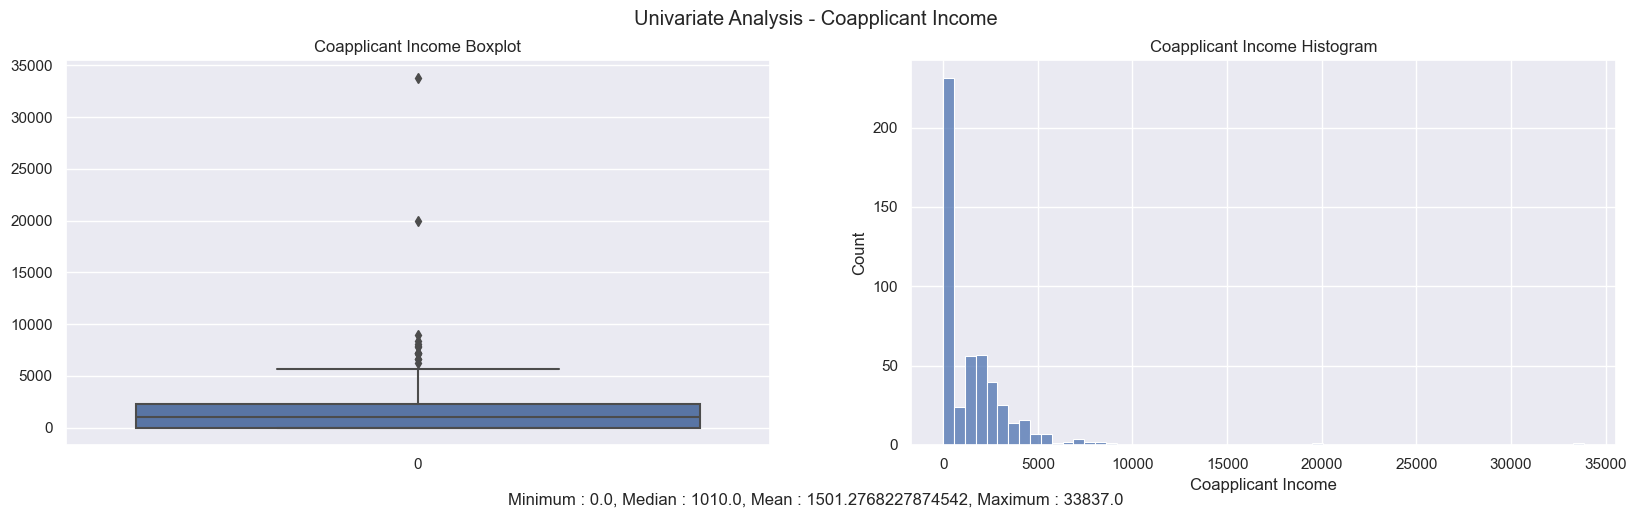

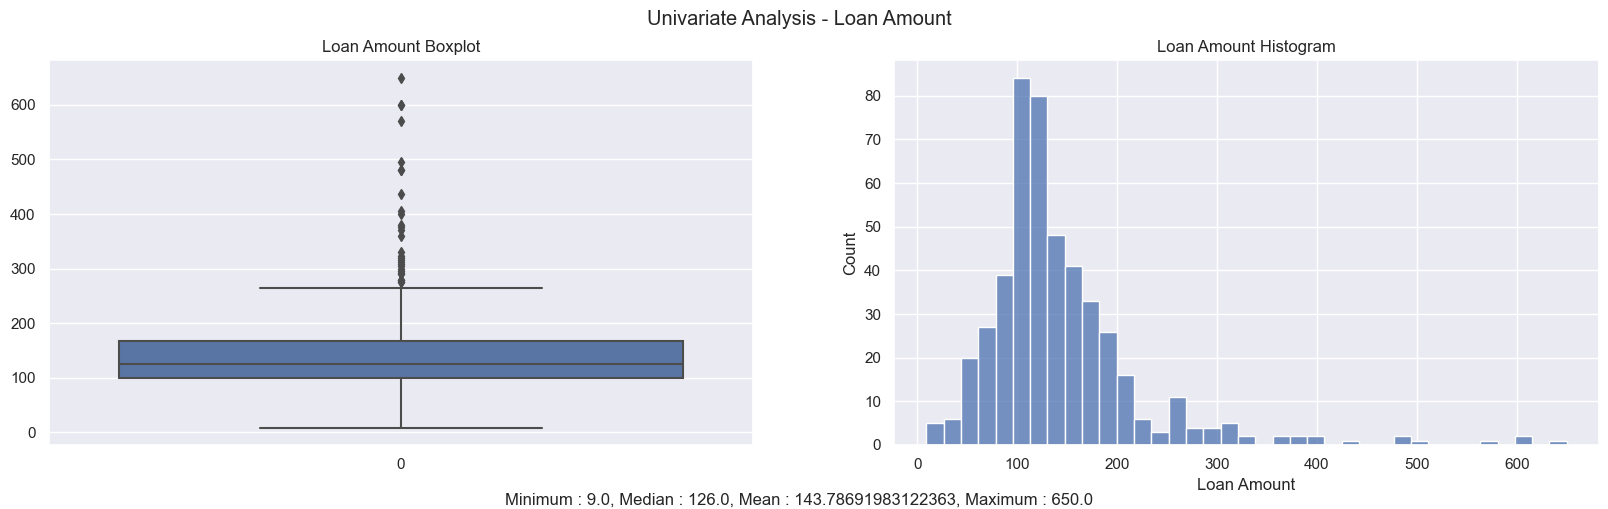

In [30]:
for feat in num_feats[:-1]:
    uni_analyis_continuous(df_train, feature=feat, feature_title=feat)

In [31]:
num_feats

['Applicant Income', 'Coapplicant Income', 'Loan Amount', 'Loan Amount Term']

In [32]:
def plot_histograms(df, feat, binwidthlst):
    
    fig, axes = plt.subplots(1,len(binwidthlst), sharex=False, figsize=(20,5))
    fig.suptitle(f'{feat}')
    
    for i in range(len(binwidthlst)):

        sns.histplot(ax=axes[i], data=df[feat], binwidth=binwidthlst[i])
        axes[i].set_title(f'Bin Width: {binwidthlst[i]}')

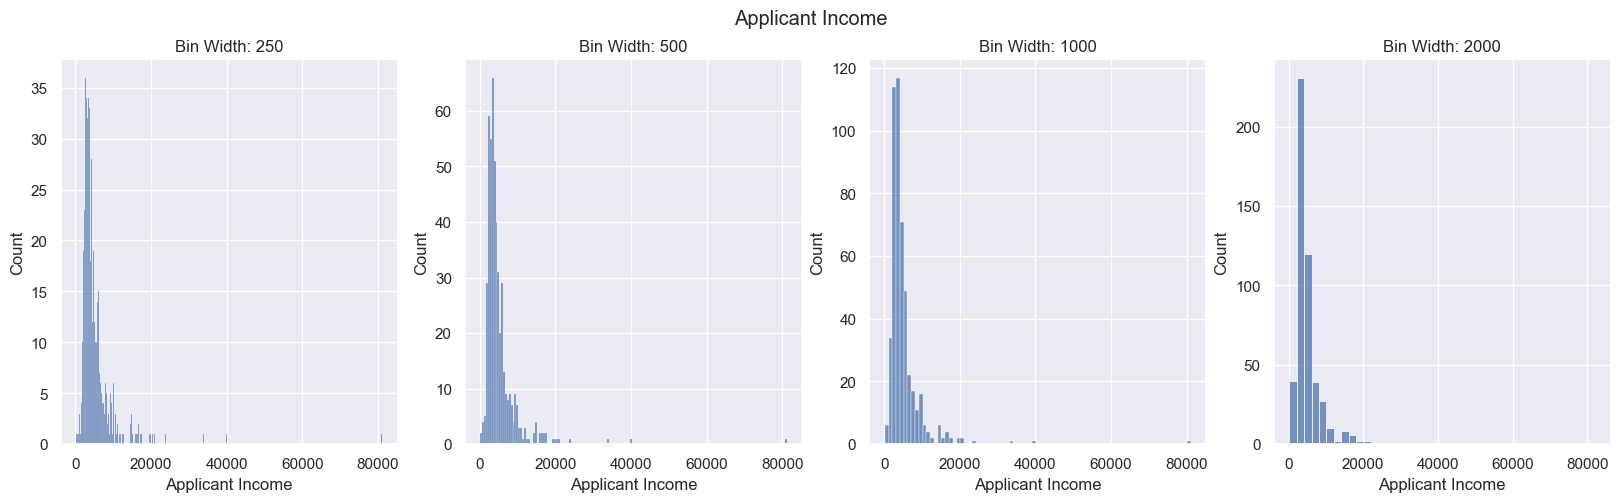

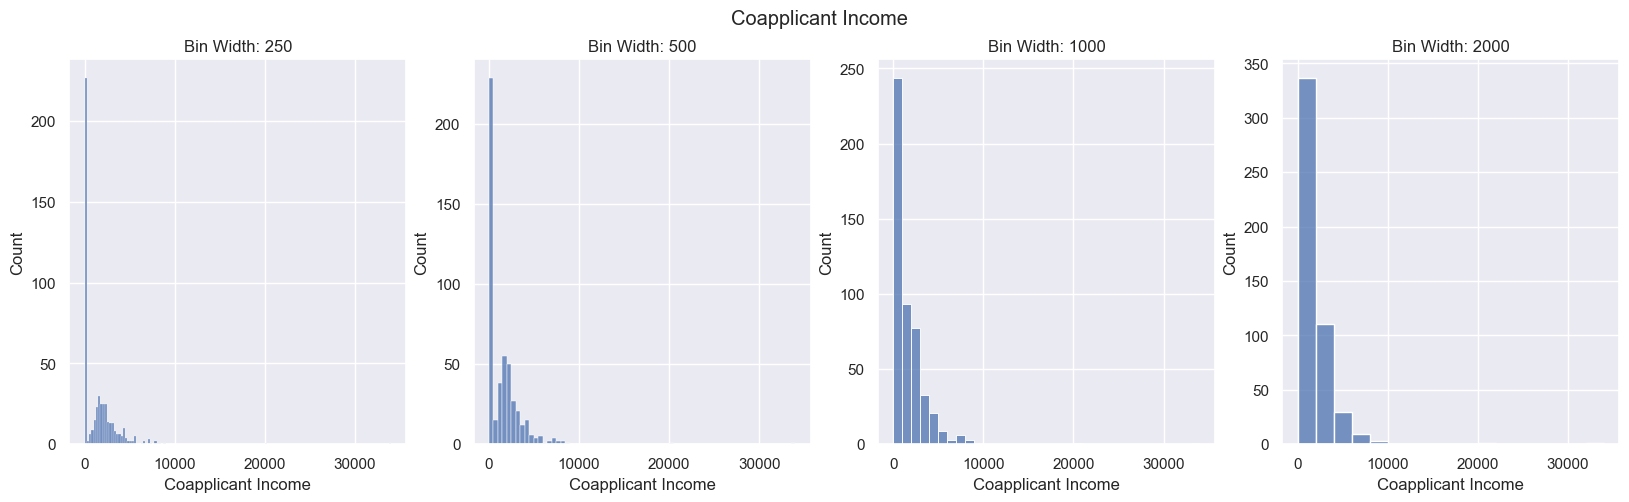

In [33]:
for feat in ['Applicant Income','Coapplicant Income']:
    plot_histograms(df=df_train, feat=feat, binwidthlst=[250,500,1000,2000])

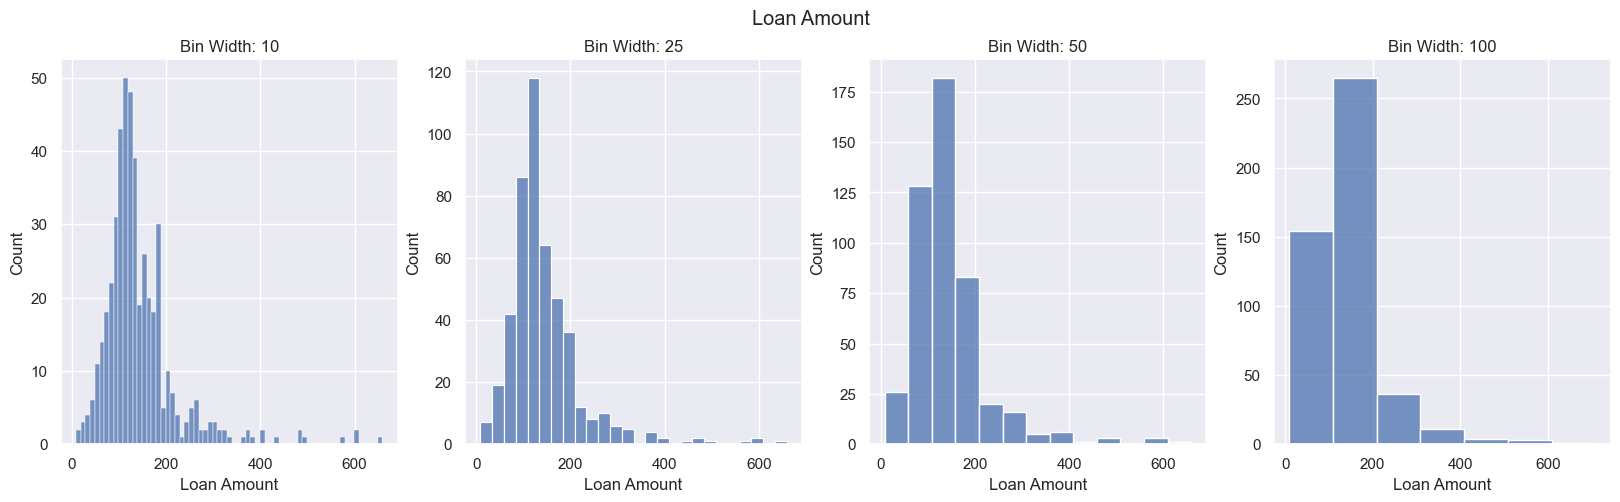

In [34]:
plot_histograms(df=df_train, feat='Loan Amount', binwidthlst=[10, 25, 50, 100])

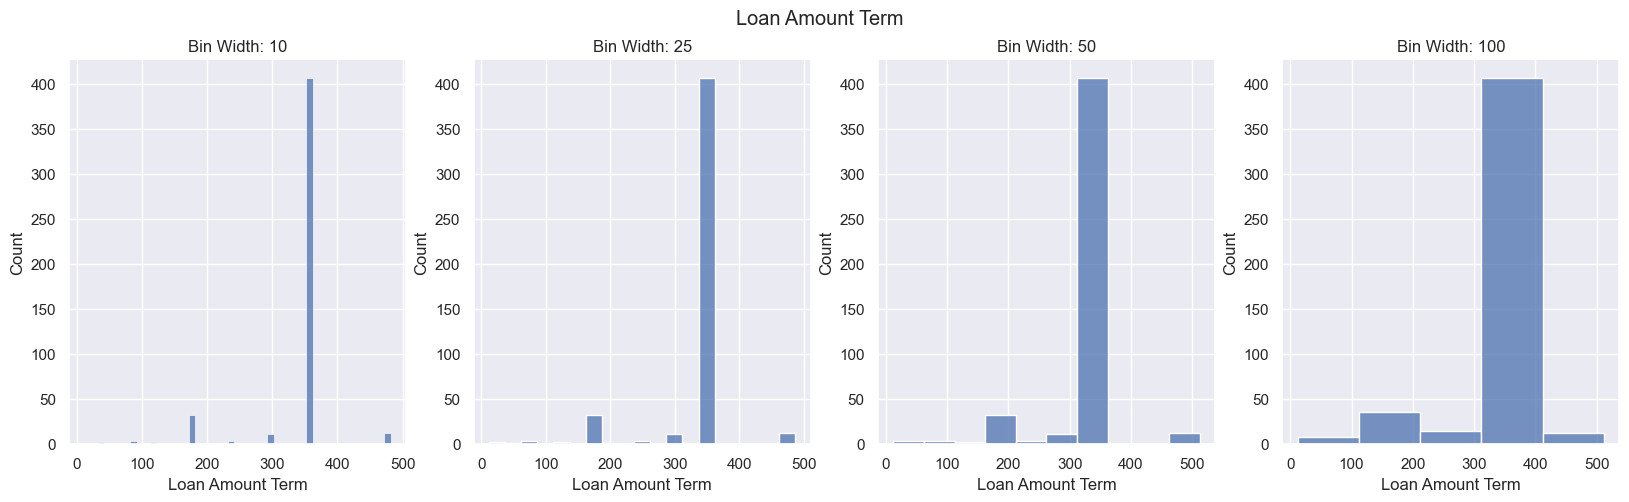

In [35]:
plot_histograms(df=df_train, feat='Loan Amount Term', binwidthlst=[10, 25, 50, 100])


Look at box plots to understand the distributions. 

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

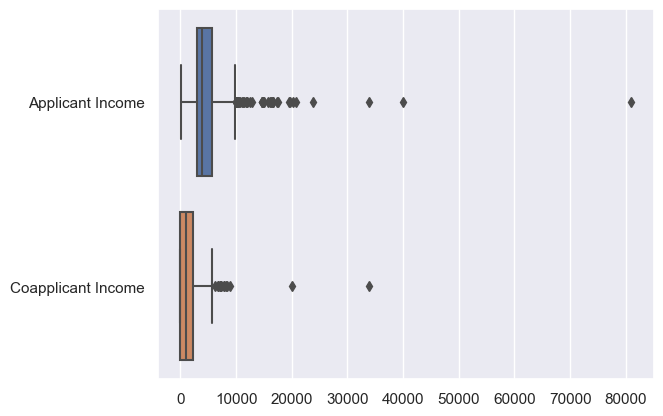

In [36]:
sns.boxplot(data=df_train[['Applicant Income','Coapplicant Income']], orient='h')

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

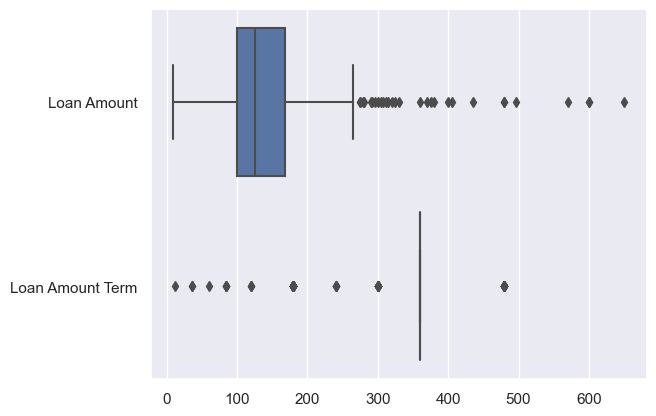

In [37]:
sns.boxplot(data=df_train[['Loan Amount','Loan Amount Term']], orient='h')

Look at the distribution of income segregated  by `Education`

In [38]:
df_train['Education'].value_counts()

Graduate        384
Not Graduate    107
Name: Education, dtype: int64

In [39]:
grad = df_train[['Applicant Income']].loc[df_train['Education']=='Graduate']
n_grad = df_train[['Applicant Income']].loc[df_train['Education']=='Not Graduate']

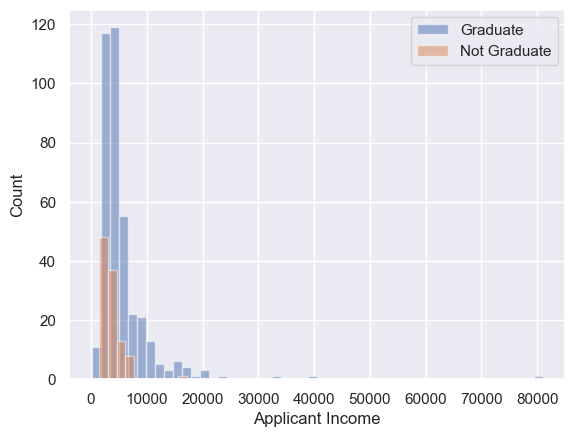

In [40]:
plt.hist(grad, bins=50, alpha=0.5, label='Graduate')
plt.hist(n_grad, bins=10, alpha=0.5, label='Not Graduate')
plt.legend(loc='upper right')
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.show()

In [41]:
grad = df_train[['Coapplicant Income']].loc[df_train['Education']=='Graduate']
n_grad = df_train[['Coapplicant Income']].loc[df_train['Education']=='Not Graduate']

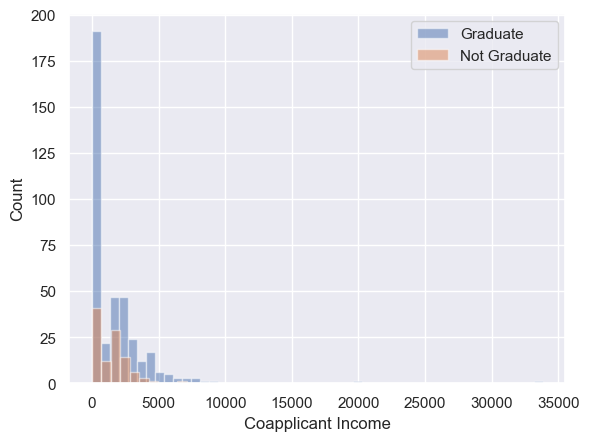

In [42]:
plt.hist(grad, bins=50, alpha=0.5, label='Graduate')
plt.hist(n_grad, bins=10, alpha=0.5, label='Not Graduate')
plt.legend(loc='upper right')
plt.xlabel('Coapplicant Income')
plt.ylabel('Count')
plt.show()

Look at the histogram and boxplot of LoanAmount

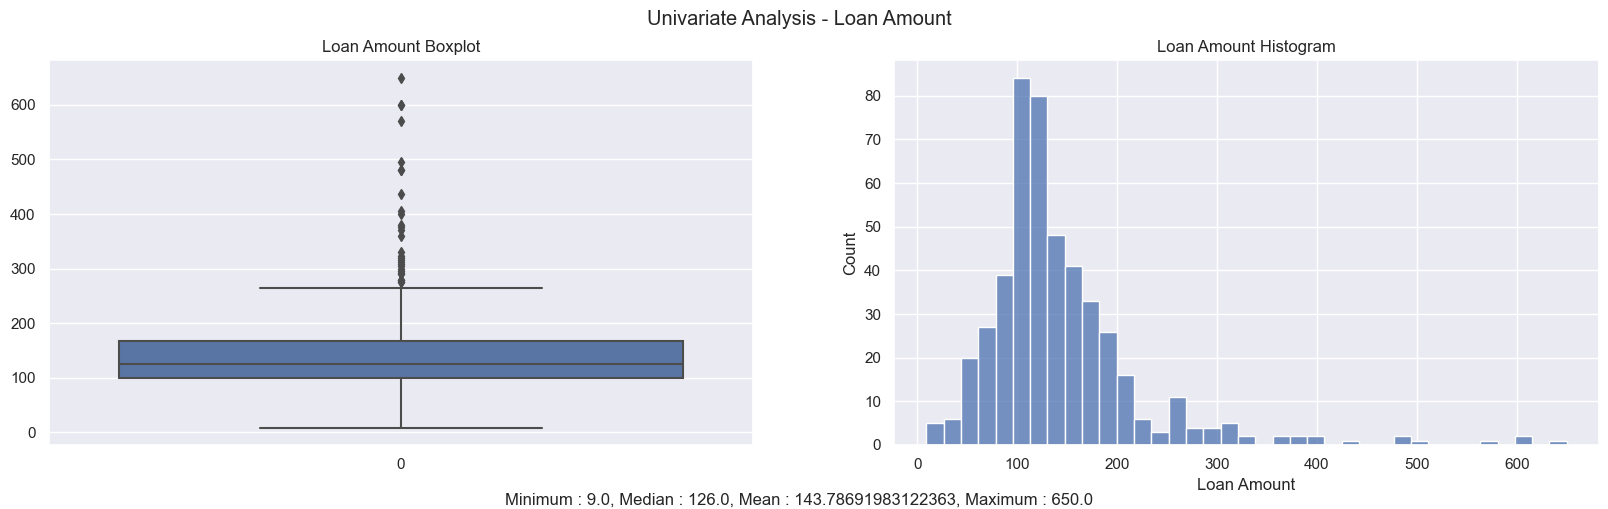

In [43]:
uni_analyis_continuous(df_train, feature='Loan Amount', feature_title='Loan Amount')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [44]:
df_train_all = pd.concat([df_train,y_train], axis=1)
df_train_all.head()

,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
579,Male,No,0,Graduate,NaN,3182,2917.0,161.0,360.0,1.0,Urban,1
199,Male,No,0,Graduate,Yes,11000,0.0,83.0,360.0,1.0,Urban,0
266,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban,1
309,Male,Yes,2,Not Graduate,No,7667,0.0,185.0,360.0,NaN,Rural,1
589,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,0


In [45]:
df_train_all['Gender Approval Rate'] = (df_train_all['Loan Status'].groupby(df_train_all['Gender']).transform('sum'))/df_train_all['Gender'].groupby(df_train_all['Gender']).transform('count')
df_train_all['Married Approval Rate'] = (df_train_all['Loan Status'].groupby(df_train_all['Married']).transform('sum'))/df_train_all['Married'].groupby(df_train_all['Married']).transform('count')
df_train_all['Dependents Approval Rate'] = (df_train_all['Loan Status'].groupby(df_train_all['Dependents']).transform('sum'))/df_train_all['Dependents'].groupby(df_train_all['Dependents']).transform('count')
df_train_all['Education Approval Rate'] = (df_train_all['Loan Status'].groupby(df_train_all['Education']).transform('sum'))/df_train_all['Education'].groupby(df_train_all['Education']).transform('count')
df_train_all['Self Employed Approval Rate'] = (df_train_all['Loan Status'].groupby(df_train_all['Self Employed']).transform('sum'))/df_train_all['Self Employed'].groupby(df_train_all['Self Employed']).transform('count')
df_train_all['Property Area Approval Rate'] = (df_train_all['Loan Status'].groupby(df_train_all['Property Area']).transform('sum'))/df_train_all['Property Area'].groupby(df_train_all['Property Area']).transform('count')

In [46]:
df_train_all.head()

,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status,Gender Approval Rate,Married Approval Rate,Dependents Approval Rate,Education Approval Rate,Self Employed Approval Rate,Property Area Approval Rate
579,Male,No,0,Graduate,NaN,3182,2917.0,161.0,360.0,1.0,Urban,1,0.696658,0.644970,0.691489,0.713542,NaN,0.666667
199,Male,No,0,Graduate,Yes,11000,0.0,83.0,360.0,1.0,Urban,0,0.696658,0.644970,0.691489,0.713542,0.650794,0.666667
266,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban,1,0.696658,0.717868,0.756410,0.713542,0.700495,0.759358
309,Male,Yes,2,Not Graduate,No,7667,0.0,185.0,360.0,NaN,Rural,1,0.696658,0.717868,0.756410,0.626168,0.700495,0.641379
589,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,0,0.696658,0.717868,0.756410,0.713542,0.650794,0.759358


<AxesSubplot: xlabel='Gender'>

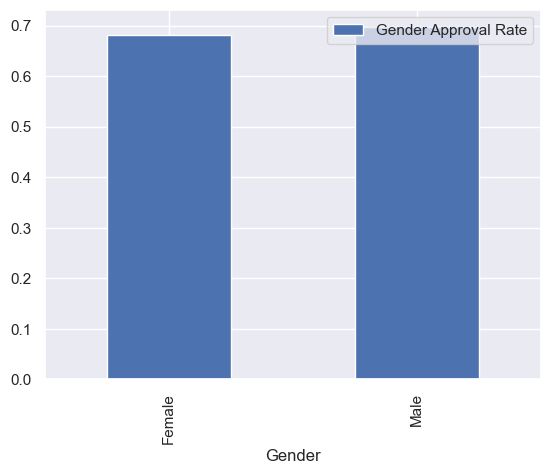

In [47]:
table = pd.pivot_table(df_train_all, values=['Gender Approval Rate'], index=['Gender'],
                    aggfunc={'Gender Approval Rate': 'max',
                             })

table.plot(kind='bar')

<AxesSubplot: xlabel='Married'>

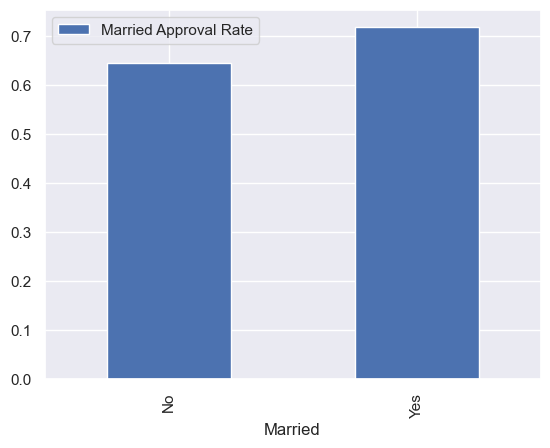

In [48]:
table = pd.pivot_table(df_train_all, values=['Married Approval Rate'], index=['Married'],
                    aggfunc={'Married Approval Rate': 'max',
                             })

table.plot(kind='bar')

<AxesSubplot: xlabel='Dependents'>

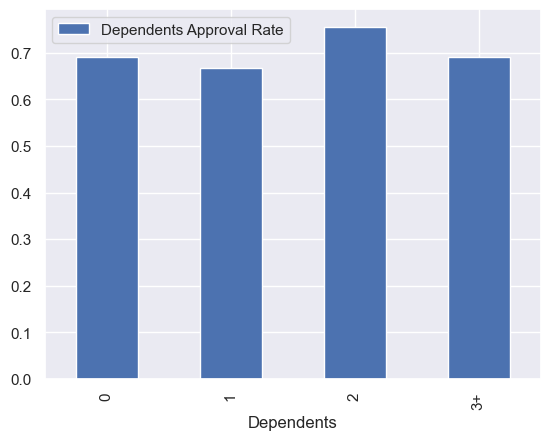

In [49]:
table = pd.pivot_table(df_train_all, values=['Dependents Approval Rate'], index=['Dependents'],
                    aggfunc={'Dependents Approval Rate': 'max',
                             })

table.plot(kind='bar')

<AxesSubplot: xlabel='Education'>

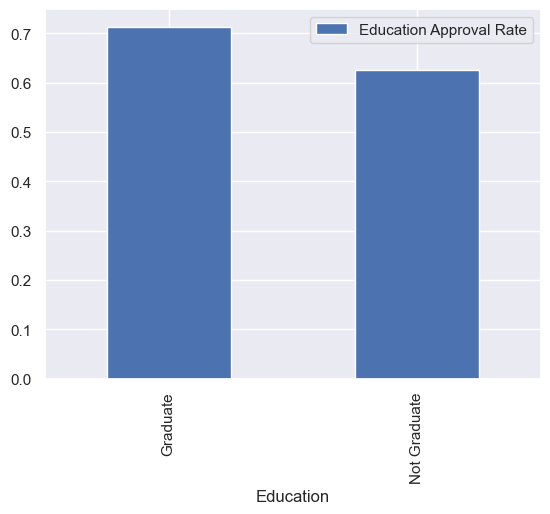

In [50]:
table = pd.pivot_table(df_train_all, values=['Education Approval Rate'], index=['Education'],
                    aggfunc={'Education Approval Rate': 'max',
                             })

table.plot(kind='bar')

<AxesSubplot: xlabel='Self Employed'>

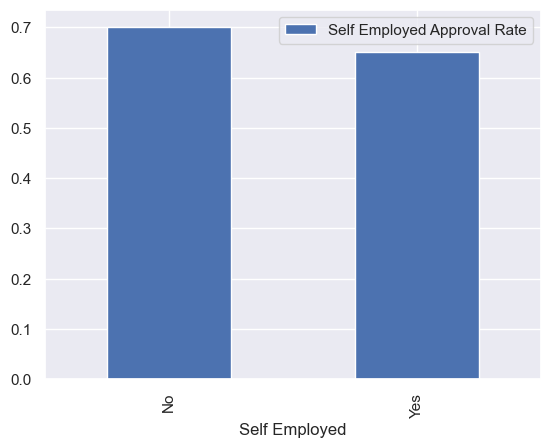

In [51]:
table = pd.pivot_table(df_train_all, values=['Self Employed Approval Rate'], index=['Self Employed'],
                    aggfunc={'Self Employed Approval Rate': 'max',
                             })

table.plot(kind='bar')

<AxesSubplot: xlabel='Property Area'>

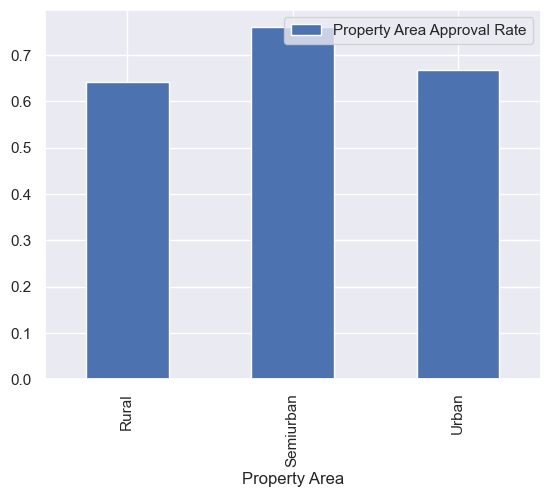

In [52]:
table = pd.pivot_table(df_train_all, values=['Property Area Approval Rate'], index=['Property Area'],
                    aggfunc={'Property Area Approval Rate': 'max',
                             })

table.plot(kind='bar')

In [53]:
# table = pd.pivot_table(df_train_all, values=['Loan Status'], index=['Gender'],
#                     aggfunc={'Gender': 'count',
#                              'Loan Status': np.sum,
#                              })

# table

In [54]:
# cat_feats.pop(0)
# for feat in cat_feats:
#     table = pd.pivot_table(df_train_all, values='Loan Status', index=['Gender'],
#                     columns=[feat], aggfunc=np.mean)
#     ax = table.plot(kind='bar')
#     ax.set_ylabel('Mean Loan Approval')

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [55]:
# Use SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# define individual transformers in a pipeline
numerical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='mean'))])
categorical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='most_frequent'))])

preprocessing = ColumnTransformer([('numeric', numerical_preprocessing, ['Applicant Income',
 'Coapplicant Income',
 'Loan Amount',
 'Loan Amount Term',
 'Credit History']),
                                    ('categorical', categorical_preprocessing, ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self Employed',
 'Property Area'])])

In [56]:
df_train['Credit History'].value_counts()

1.0    381
0.0     70
Name: Credit History, dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

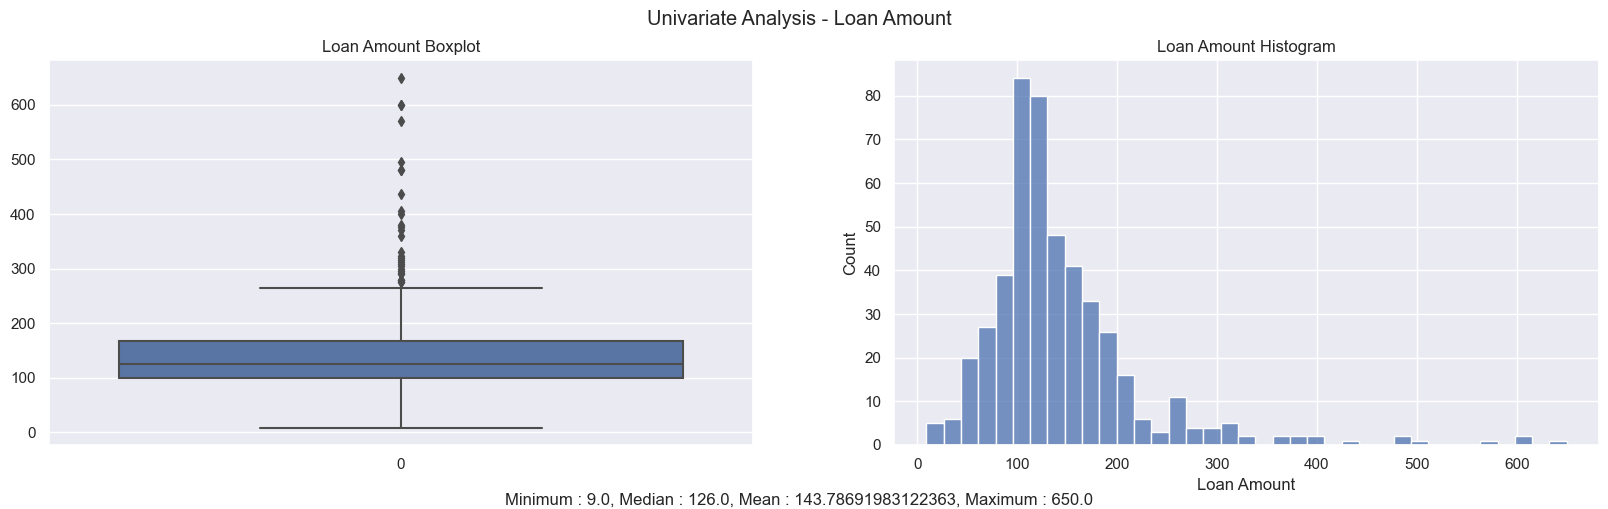

In [57]:
uni_analyis_continuous(df_train, feature='Loan Amount', feature_title='Loan Amount')

In [58]:
df_train['Loan Amount'] = np.log(df_train['Loan Amount'])

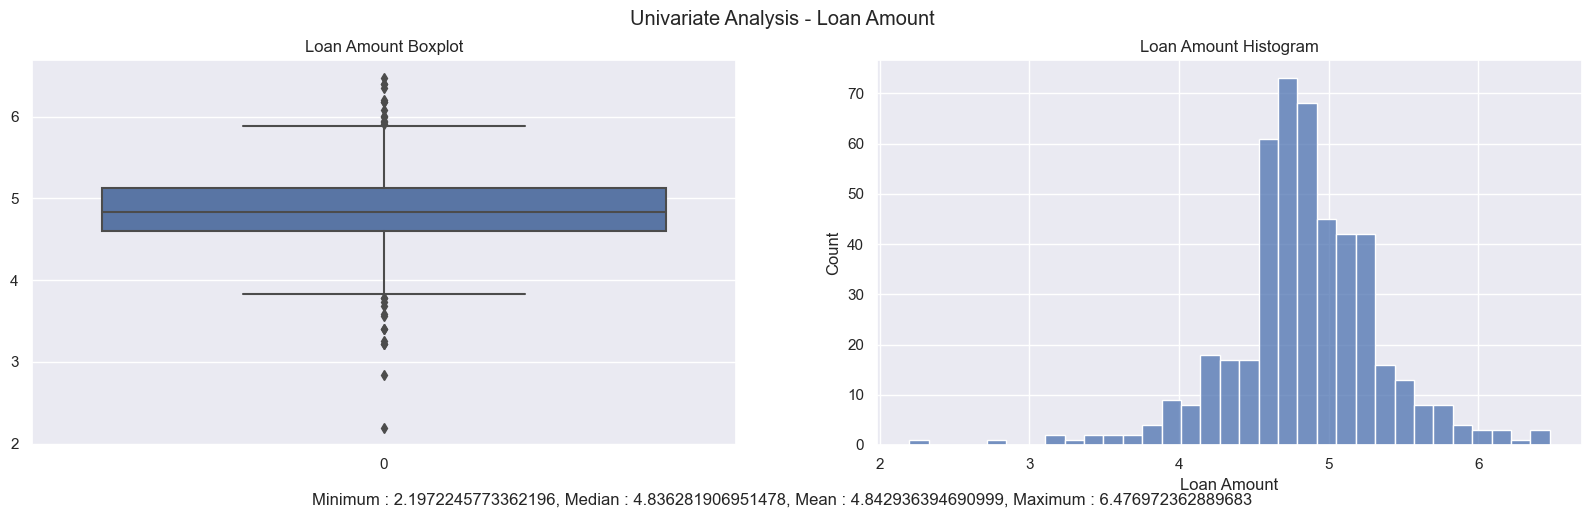

In [59]:
uni_analyis_continuous(df_train, feature='Loan Amount', feature_title='Loan Amount')

Drop extreme outliers for Applicant Income and Coapplicant Income

In [60]:
# df_train['Applicant Income'].quantile(0.99)

In [61]:
# df_train['Coapplicant Income'].quantile(0.99)

In [62]:
# df_train = df_train[df_train['Applicant Income'] < df_train['Applicant Income'].quantile(0.99)]
# df_train = df_train[df_train['Coapplicant Income'] < df_train['Coapplicant Income'].quantile(0.99)]

In [63]:
df_train.head()

,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area
579,Male,No,0,Graduate,NaN,3182,2917.0,5.081404,360.0,1.0,Urban
199,Male,No,0,Graduate,Yes,11000,0.0,4.418841,360.0,1.0,Urban
266,Male,Yes,2,Graduate,No,4708,1387.0,5.010635,360.0,1.0,Semiurban
309,Male,Yes,2,Not Graduate,No,7667,0.0,5.220356,360.0,NaN,Rural
589,Male,Yes,2,Graduate,Yes,2726,0.0,4.663439,360.0,0.0,Semiurban


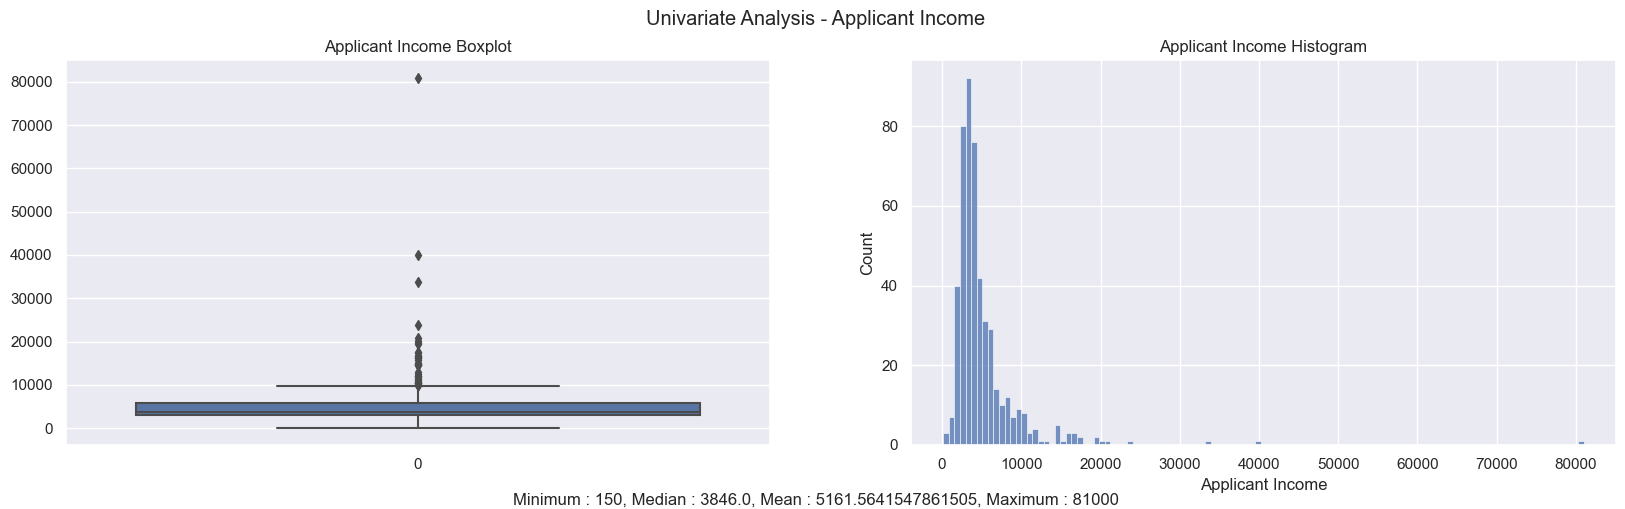

In [64]:
uni_analyis_continuous(df_train, feature='Applicant Income', feature_title='Applicant Income')

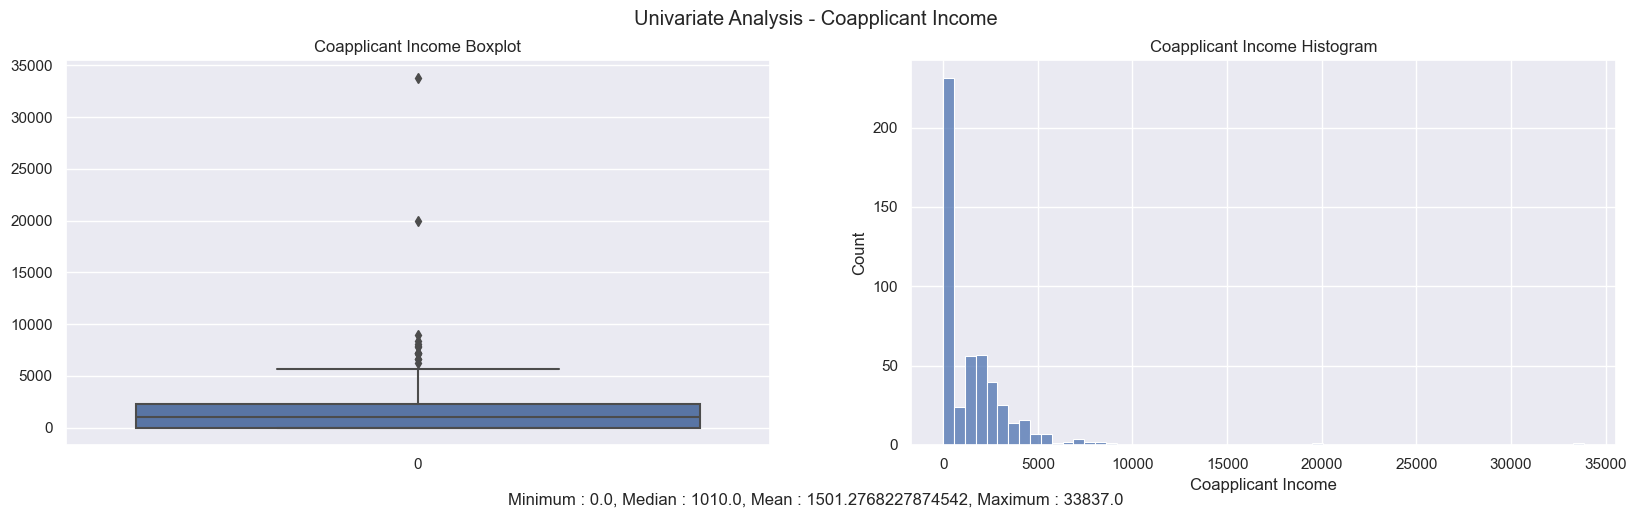

In [65]:
uni_analyis_continuous(df_train, feature='Coapplicant Income', feature_title='Coapplicant Income')

Combine both incomes as total income and take a log transformation of the same.

In [66]:
df_train_all['Total Income'] = df_train_all['Applicant Income'] + df_train_all['Coapplicant Income']

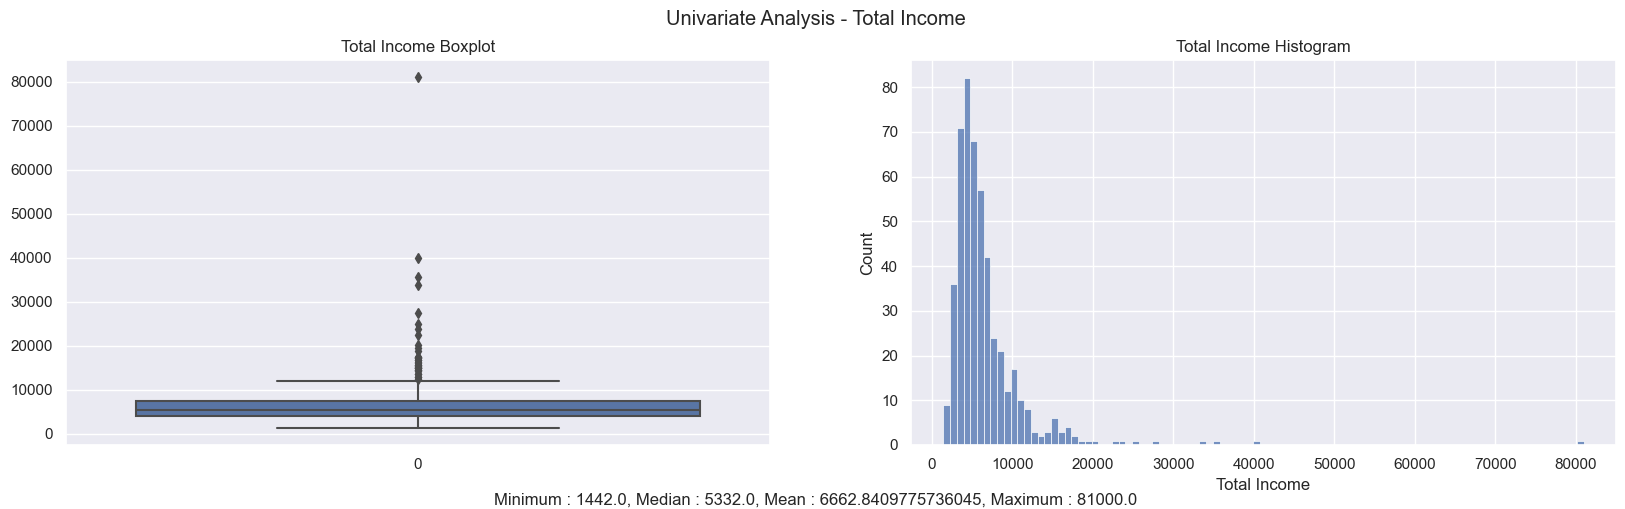

In [67]:
uni_analyis_continuous(df_train_all, feature='Total Income', feature_title='Total Income')

In [68]:
df_train_all['Total Income'] = np.log(df_train_all['Total Income'])

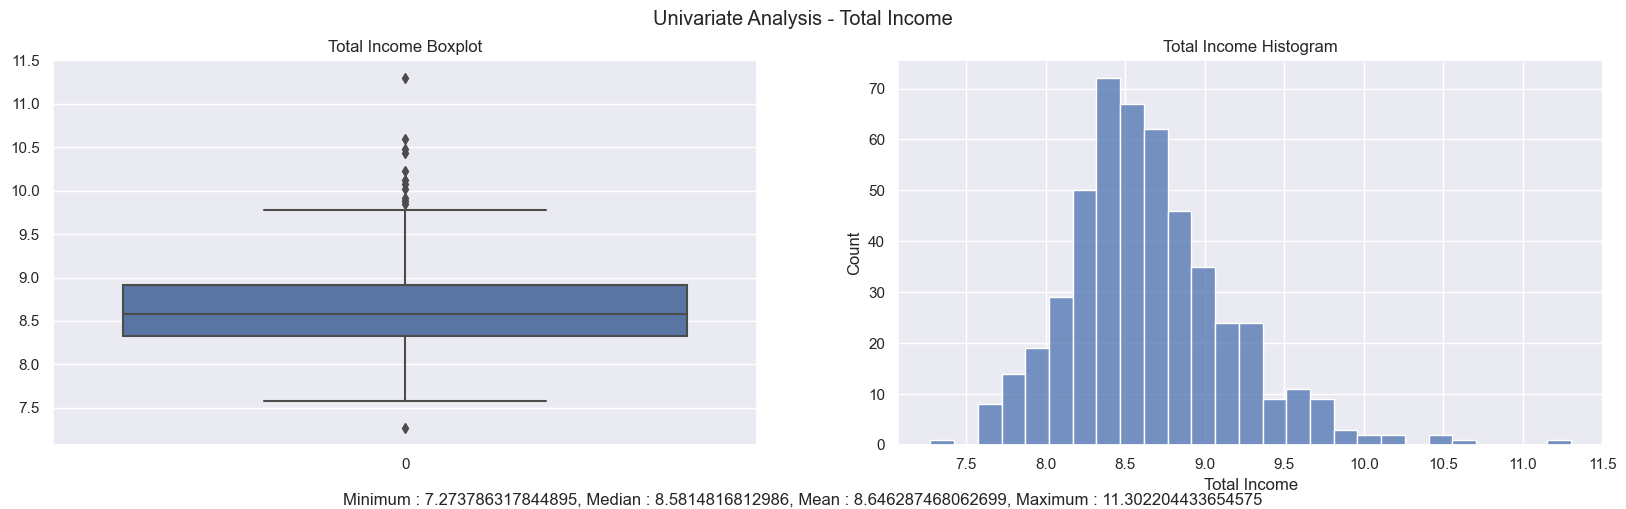

In [69]:
uni_analyis_continuous(df_train_all, feature='Total Income', feature_title='Total Income')

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 579 to 510
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              483 non-null    object 
 1   Married             488 non-null    object 
 2   Dependents          477 non-null    object 
 3   Education           491 non-null    object 
 4   Self Employed       467 non-null    object 
 5   Applicant Income    491 non-null    int64  
 6   Coapplicant Income  491 non-null    float64
 7   Loan Amount         474 non-null    float64
 8   Loan Amount Term    478 non-null    float64
 9   Credit History      451 non-null    object 
 10  Property Area       491 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 62.2+ KB


## 4. Feature Engineering

## 5. Building a Predictive Model

Try paramater grid search to improve the results

## 6. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [131]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [100]:
cat_feats = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
num_feats = df_train.dtypes[~df_train.dtypes.index.isin(cat_feats)].index.tolist()

In [101]:
cat_feats

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self Employed',
 'Credit History',
 'Property Area']

In [102]:
num_feats

['Applicant Income', 'Coapplicant Income', 'Loan Amount', 'Loan Amount Term']

In [103]:
# Using own function in Pipeline

# def numFeat(data):
#     return data[num_feats]

# def catFeat(data):
#     return data[cat_feats]

In [104]:
# numFeat(df_train).head()

In [105]:
# catFeat(df_train).head()

In [106]:
# keep_num = FunctionTransformer(numFeat)
# keep_cat = FunctionTransformer(catFeat)

In [107]:
# class CatFeats:
#     def __init__(self, data):
#         self.data = data

#     def fit(self, X, y=None):
#         pass

#     def transform(self, X, y=None):
#         cat_feats = self.data.dtypes[self.data.dtypes == 'object'].index.tolist()
#         return X[cat_feats]

#     def fit_transform(self, X, y=None):
#         self.fit(X)
#         return self.transform(X)

# class NumFeats:
#     def __init__(self, data):
#         self.data = data

#     def fit(self, X, y=None):
#         pass

#     def transform(self, X, y=None):
#         cat_feats = self.data.dtypes[self.data.dtypes == 'object'].index.tolist()
#         num_feats = self.data.dtypes[~self.data.dtypes.index.isin(cat_feats)].index.tolist()
#         return X[num_feats]

#     def fit_transform(self, X, y=None):
#         self.fit(X)
#         return self.transform(X)

## Logistic Regression - Iteration 1

In [108]:
categorical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='most_frequent')),
                                    ('ohe',OneHotEncoder(sparse=False))])

numerical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='mean')),
                                    ('scaling', StandardScaler())])

preprocessing = ColumnTransformer([('numeric', numerical_preprocessing, 
[
 'Applicant Income',
 'Coapplicant Income',
 'Loan Amount',
 'Loan Amount Term',
 ]),
                                    ('categorical', categorical_preprocessing, 
[
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self Employed',
 'Property Area',
 'Credit History'])])

# feature_union = FeatureUnion([('pca', PCA(n_components=3)), 
#                               ('select_best', SelectKBest(k=3))])

pipeline = Pipeline([('preprocessing', preprocessing),
                    # ('selection', feature_union),
                    ('model',LogisticRegression())])

pipeline.fit(df_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Applicant Income',
                                                   'Coapplicant Income',
                                                   'Loan Amount',
                                                   'Loan Amount Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self Employed',
                                                   'Property Area',
                                                   'Credit History'])])),
                ('model', LogisticRegression())])

In [109]:
# categorical_preprocessing = Pipeline([('keep_cat', FunctionTransformer(catFeat)),
#                                     ('imputation', SimpleImputer(strategy='most_frequent')),
#                                     ('ohe',OneHotEncoder(sparse=False))])

# numerical_preprocessing = Pipeline([('keep_num', FunctionTransformer(numFeat)),
#                                     ('imputation', SimpleImputer(strategy='mean')),
#                                     ('scaling', StandardScaler())])

# preprocessing = ColumnTransformer([('numeric', numerical_preprocessing, num_feats),
#                                     ('categorical', categorical_preprocessing, cat_feats)])

# # feature_union = FeatureUnion([('pca', PCA(n_components=3)), 
# #                               ('select_best', SelectKBest(k=3))])

# pipeline = Pipeline([('preprocessing', preprocessing),
#                     # ('selection', feature_union),
#                     ('model',LogisticRegression())])

# pipeline.fit(df_train, y_train)

In [110]:
pickle.dump(pipeline, open("..\data\lr_model1.pkl", "wb" ))

In [111]:
print(f'Training score: {pipeline.score(df_train, y_train)}')
print(f'Test score: {pipeline.score(df_test, y_test)}')

Training score: 0.8167006109979633
Test score: 0.34146341463414637


In [ ]:
y_pred = pipeline.predict(df_test)

y_compare = pd.DataFrame([y_test.to_numpy(), y_pred], index=['y_test', 'y_pred'])
y_compare.T.head()

,y_test,y_pred
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0


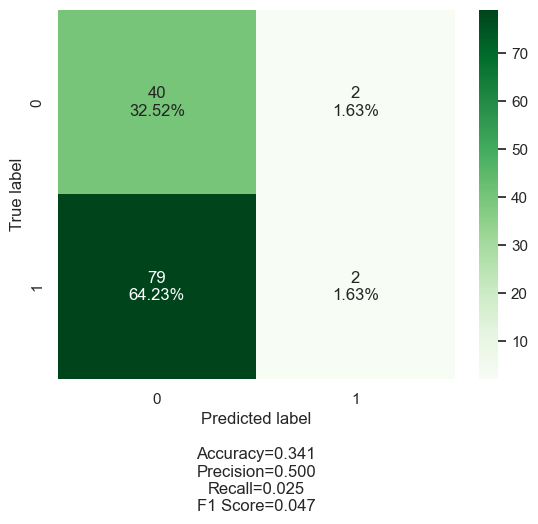

In [ ]:
import sys
import os
from sklearn.metrics import confusion_matrix

# adding python_functions subfolder to the system path
var = os.environ['PYTHONPATH']
sys.path.insert(0, var)
    
# importing the make_confusion_matrix
from confusion_matrix import make_confusion_matrix
# (refer to https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea for code)

cf_matrix = confusion_matrix(y_test, y_pred)

# calling make_confusion_matrix function
result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

## Naive Bayes - Iteration 1

In [114]:
categorical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='most_frequent')),
                                    ('ohe',OneHotEncoder(sparse=False))])

numerical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='mean')),
                                    ('scaling', StandardScaler())])

preprocessing = ColumnTransformer([('numeric', numerical_preprocessing, 
[
 'Applicant Income',
 'Coapplicant Income',
 'Loan Amount',
 'Loan Amount Term',
 ]),
                                    ('categorical', categorical_preprocessing, 
[
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self Employed',
 'Property Area',
 'Credit History'])])

# feature_union = FeatureUnion([('pca', PCA(n_components=3)), 
#                               ('select_best', SelectKBest(k=3))])

pipeline = Pipeline([('preprocessing', preprocessing),
                    # ('selection', feature_union),
                    ('model',GaussianNB())])

pipeline.fit(df_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Applicant Income',
                                                   'Coapplicant Income',
                                                   'Loan Amount',
                                                   'Loan Amount Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self Employed',
                                                   'Property Area',
                                                   'Credit History'])])),
                ('model', GaussianNB())])

In [118]:
pickle.dump(pipeline, open(r"..\data\nb_model1.pkl", "wb" ))

In [119]:
print(f'Training score: {pipeline.score(df_train, y_train)}')
print(f'Test score: {pipeline.score(df_test, y_test)}')

Training score: 0.8105906313645621
Test score: 0.6666666666666666


In [120]:
y_pred = pipeline.predict(df_test)

y_compare = pd.DataFrame([y_test.to_numpy(), y_pred], index=['y_test', 'y_pred'])
y_compare.T.head()

,y_test,y_pred
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1


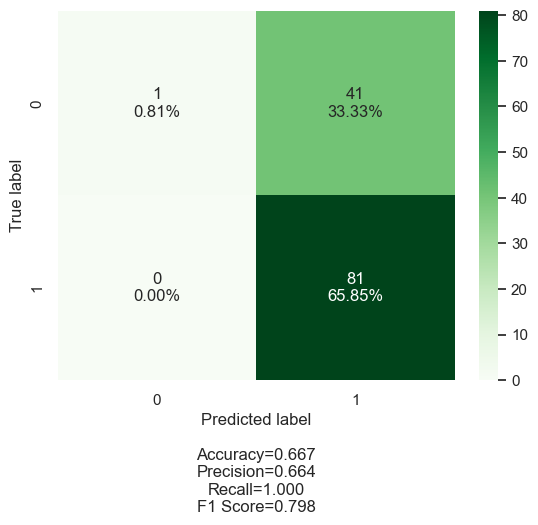

In [121]:
import sys
import os
from sklearn.metrics import confusion_matrix

# adding python_functions subfolder to the system path
var = os.environ['PYTHONPATH']
sys.path.insert(0, var)
    
# importing the make_confusion_matrix
from confusion_matrix import make_confusion_matrix
# (refer to https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea for code)

cf_matrix = confusion_matrix(y_test, y_pred)

# calling make_confusion_matrix function
result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

## Decision Trees - Iteration 1

In [125]:
categorical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='most_frequent')),
                                    ('ohe',OneHotEncoder(sparse=False))])

numerical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='mean')),
                                    ('scaling', StandardScaler())])

preprocessing = ColumnTransformer([('numeric', numerical_preprocessing, 
[
 'Applicant Income',
 'Coapplicant Income',
 'Loan Amount',
 'Loan Amount Term',
 ]),
                                    ('categorical', categorical_preprocessing, 
[
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self Employed',
 'Property Area',
 'Credit History'])])

# feature_union = FeatureUnion([('pca', PCA(n_components=3)), 
#                               ('select_best', SelectKBest(k=3))])

pipeline = Pipeline([('preprocessing', preprocessing),
                    # ('selection', feature_union),
                    ('model',DecisionTreeClassifier(max_depth=2))])

pipeline.fit(df_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Applicant Income',
                                                   'Coapplicant Income',
                                                   'Loan Amount',
                                                   'Loan Amount Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self Employed',
                                                   'Property Area',
                                                   'Credit History'])])),
                ('model', DecisionTreeClassifier(max_depth=2))])

In [127]:
pickle.dump(pipeline, open(r"..\data\dt_model1.pkl", "wb" ))

In [126]:
print(f'Training score: {pipeline.score(df_train, y_train)}')
print(f'Test score: {pipeline.score(df_test, y_test)}')

Training score: 0.8187372708757638
Test score: 0.7723577235772358


In [128]:
y_pred = pipeline.predict(df_test)

y_compare = pd.DataFrame([y_test.to_numpy(), y_pred], index=['y_test', 'y_pred'])
y_compare.T.head()

,y_test,y_pred
0,0,1
1,1,1
2,1,1
3,1,1
4,1,0


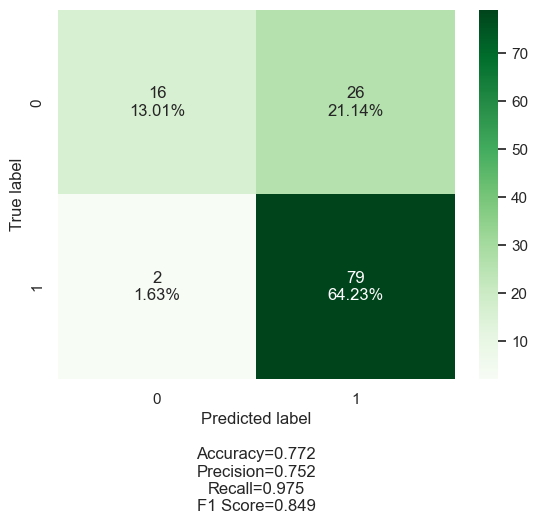

In [129]:
import sys
import os
from sklearn.metrics import confusion_matrix

# adding python_functions subfolder to the system path
var = os.environ['PYTHONPATH']
sys.path.insert(0, var)
    
# importing the make_confusion_matrix
from confusion_matrix import make_confusion_matrix
# (refer to https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea for code)

cf_matrix = confusion_matrix(y_test, y_pred)

# calling make_confusion_matrix function
result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

## SVM - Iteration 1

In [140]:
categorical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='most_frequent')),
                                    ('ohe',OneHotEncoder(sparse=False))])

numerical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='mean')),
                                    ('scaling', StandardScaler())])

preprocessing = ColumnTransformer([('numeric', numerical_preprocessing, 
[
 'Applicant Income',
 'Coapplicant Income',
 'Loan Amount',
 'Loan Amount Term',
 ]),
                                    ('categorical', categorical_preprocessing, 
[
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self Employed',
 'Property Area',
 'Credit History'])])

# feature_union = FeatureUnion([('pca', PCA(n_components=3)), 
#                               ('select_best', SelectKBest(k=3))])

pipeline = Pipeline([('preprocessing', preprocessing),
                    # ('selection', feature_union),
                    ('model',svm.SVC(kernel='linear',random_state=0))])

pipeline.fit(df_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Applicant Income',
                                                   'Coapplicant Income',
                                                   'Loan Amount',
                                                   'Loan Amount Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self Employed',
                                                   'Property Area',
                                                   'Credit History'])])),
                ('model', SVC(kernel='linear', random_state=0))])

In [141]:
pickle.dump(pipeline, open(r"..\data\svm_model1.pkl", "wb" ))

In [142]:
print(f'Training score: {pipeline.score(df_train, y_train)}')
print(f'Test score: {pipeline.score(df_test, y_test)}')

Training score: 0.8167006109979633
Test score: 0.7804878048780488


In [143]:
y_pred = pipeline.predict(df_test)

y_compare = pd.DataFrame([y_test.to_numpy(), y_pred], index=['y_test', 'y_pred'])
y_compare.T.head()

,y_test,y_pred
0,0,1
1,1,1
2,1,1
3,1,1
4,1,0


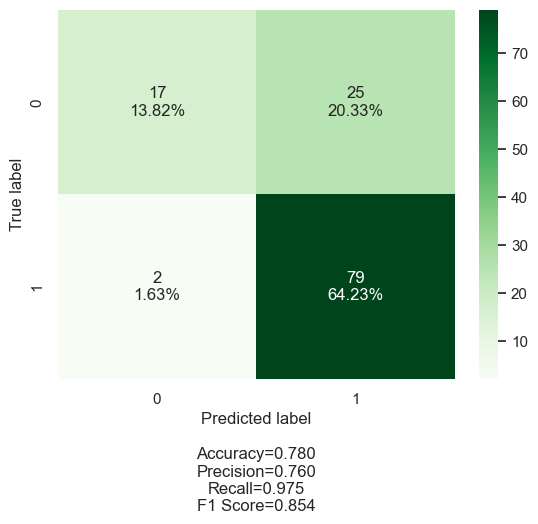

In [144]:
import sys
import os
from sklearn.metrics import confusion_matrix

# adding python_functions subfolder to the system path
var = os.environ['PYTHONPATH']
sys.path.insert(0, var)
    
# importing the make_confusion_matrix
from confusion_matrix import make_confusion_matrix
# (refer to https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea for code)

cf_matrix = confusion_matrix(y_test, y_pred)

# calling make_confusion_matrix function
result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

## SGD - Iteration 1

In [145]:
categorical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='most_frequent')),
                                    ('ohe',OneHotEncoder(sparse=False))])

numerical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='mean')),
                                    ('scaling', StandardScaler())])

preprocessing = ColumnTransformer([('numeric', numerical_preprocessing, 
[
 'Applicant Income',
 'Coapplicant Income',
 'Loan Amount',
 'Loan Amount Term',
 ]),
                                    ('categorical', categorical_preprocessing, 
[
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self Employed',
 'Property Area',
 'Credit History'])])

# feature_union = FeatureUnion([('pca', PCA(n_components=3)), 
#                               ('select_best', SelectKBest(k=3))])

pipeline = Pipeline([('preprocessing', preprocessing),
                    # ('selection', feature_union),
                    ('model',SGDClassifier(loss="hinge", random_state=0))])

pipeline.fit(df_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Applicant Income',
                                                   'Coapplicant Income',
                                                   'Loan Amount',
                                                   'Loan Amount Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self Employed',
                                                   'Property Area',
                                                   'Credit History'])])),
                ('model', SGDClassifier(random_state=0))])

In [146]:
pickle.dump(pipeline, open(r"..\data\sgd_model1.pkl", "wb" ))

In [147]:
print(f'Training score: {pipeline.score(df_train, y_train)}')
print(f'Test score: {pipeline.score(df_test, y_test)}')

Training score: 0.8024439918533605
Test score: 0.6666666666666666


In [ ]:
y_pred = pipeline.predict(df_test)

y_compare = pd.DataFrame([y_test.to_numpy(), y_pred], index=['y_test', 'y_pred'])
y_compare.T.head()

,y_test,y_pred
0,0,1
1,1,1
2,1,1
3,1,1
4,1,0


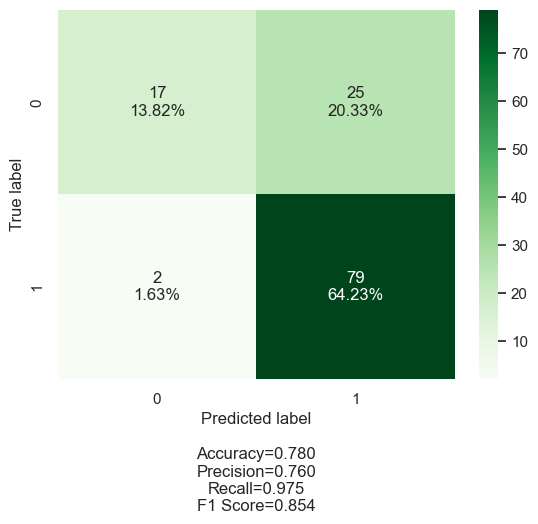

In [148]:
import sys
import os
from sklearn.metrics import confusion_matrix

# adding python_functions subfolder to the system path
var = os.environ['PYTHONPATH']
sys.path.insert(0, var)
    
# importing the make_confusion_matrix
from confusion_matrix import make_confusion_matrix
# (refer to https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea for code)

cf_matrix = confusion_matrix(y_test, y_pred)

# calling make_confusion_matrix function
result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

## Random Forest - Iteration 1

In [152]:
categorical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='most_frequent')),
                                    ('ohe',OneHotEncoder(sparse=False))])

numerical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='mean')),
                                    ('scaling', StandardScaler())])

preprocessing = ColumnTransformer([('numeric', numerical_preprocessing, 
[
 'Applicant Income',
 'Coapplicant Income',
 'Loan Amount',
 'Loan Amount Term',
 ]),
                                    ('categorical', categorical_preprocessing, 
[
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self Employed',
 'Property Area',
 'Credit History'])])

# feature_union = FeatureUnion([('pca', PCA(n_components=3)), 
#                               ('select_best', SelectKBest(k=3))])

pipeline = Pipeline([('preprocessing', preprocessing),
                    # ('selection', feature_union),
                    ('model',RandomForestClassifier(max_depth=2, random_state=0, n_jobs=-1))])

pipeline.fit(df_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Applicant Income',
                                                   'Coapplicant Income',
                                                   'Loan Amount',
                                                   'Loan Amount Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self Employed',
                                                   'Property Area',
                                                   'Credit History'])])),
                ('model',
                 RandomForestClassifier(max_depth=2, n_jobs=-1,
                                        random_state=0))])

In [153]:
pickle.dump(pipeline, open(r"..\data\rf_model1.pkl", "wb" ))

In [154]:
print(f'Training score: {pipeline.score(df_train, y_train)}')
print(f'Test score: {pipeline.score(df_test, y_test)}')

Training score: 0.8167006109979633
Test score: 0.7804878048780488


In [155]:
y_pred = pipeline.predict(df_test)

y_compare = pd.DataFrame([y_test.to_numpy(), y_pred], index=['y_test', 'y_pred'])
y_compare.T.head()

,y_test,y_pred
0,0,1
1,1,1
2,1,1
3,1,1
4,1,0


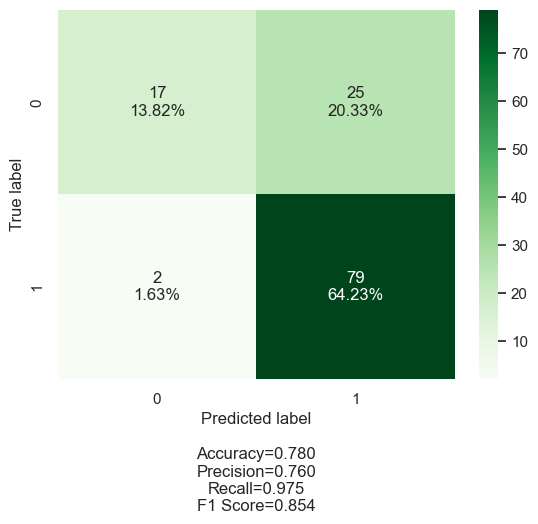

In [156]:
import sys
import os
from sklearn.metrics import confusion_matrix

# adding python_functions subfolder to the system path
var = os.environ['PYTHONPATH']
sys.path.insert(0, var)
    
# importing the make_confusion_matrix
from confusion_matrix import make_confusion_matrix
# (refer to https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea for code)

cf_matrix = confusion_matrix(y_test, y_pred)

# calling make_confusion_matrix function
result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

## 7. Deploy your model to cloud and test it with PostMan, BASH or Python

In [175]:
json_data = df_test.iloc[2,:].to_dict()

In [176]:
json_data

{'Gender': 'Male',
 'Married': 'No',
 'Dependents': '1',
 'Education': 'Graduate',
 'Self Employed': 'No',
 'Applicant Income': 37719,
 'Coapplicant Income': 0.0,
 'Loan Amount': 152.0,
 'Loan Amount Term': 360.0,
 'Credit History': '1.0',
 'Property Area': 'Semiurban'}

In [177]:
# import requests
# URL = "http://127.0.0.1:5000/scoring"
# # sending get request and saving the response as response object 
# r = requests.post(url = URL, json = json_data) 

In [178]:
import requests
URL = "http://ec2-54-196-154-87.compute-1.amazonaws.com:5000/scoring"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data)

In [179]:
print(r.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [171]:
y_test.iloc[2]

1

In [172]:
y_test

583    0
11     1
443    1
442    1
267    1
230    1
368    1
203    1
181    0
572    1
48     0
511    1
565    1
320    1
483    1
374    1
162    0
386    1
405    1
494    0
202    0
132    1
509    1
277    1
488    1
314    0
57     0
164    1
308    0
78     0
520    1
54     0
448    0
417    0
577    1
237    1
138    0
285    1
361    1
243    1
151    1
35     1
43     1
526    1
376    1
503    0
532    0
284    0
82     0
190    1
177    0
9      0
196    1
156    1
338    0
261    1
545    1
333    1
131    1
344    1
5      1
400    0
508    1
221    1
327    1
102    1
31     0
292    1
280    0
609    1
200    1
272    1
379    1
498    1
600    0
516    1
66     0
514    0
242    1
487    0
229    1
170    1
593    1
75     0
539    1
576    0
13     0
427    1
287    1
297    1
403    1
201    1
79     1
519    0
107    0
378    0
205    1
534    1
468    1
159    1
449    0
273    1
533    0
172    0
192    0
85     1
249    1
150    0
275    1
552    1
59     1
1